## 들어가며
---
- 시계열 예측(Time-Series Prediction)을 다루는 여러가지 통계적 기법 중 가장 널리 알려진 ARIMA(Auto-regressive Integrated Moving Average)을 알아볼 것
- 이를 토대로 특정 주식 종목의 가격을 예측해보는 실습 진행 예정
- 시계열 예측엔 ARIMA 뿐만 아니라, 페이스북에서 발표한 Prophet이라는 것도 있고, LSTM 등 딥러닝을 활용하는 방법도 있음
- ARIMA는 탄탄한 통계학 이론적 기반을 갖추고 있으며, 시계열 데이터를 이해하는 관점을 훈련하는데에도 도움이 될 것.


### 학습 목표
---
- 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.
- ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.
- 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.

### 목차
---
1. 시계열 예측이란
- 미래를 예측한다는 것은 가능할까?
- Stationary한 시계열 데이터란?
- 시계열 데이터 사례 분석
- Stationary 여부를 체크하는 통계적 방법


2. ARIMA 시계열 예측
- 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
- ARIMA 모델의 개념
- ARIMA 모델 훈련과 추론


3. 프로젝트 : 주식 예측에 도전해 보자


### 시계열 예측이란?
---
* 시계열 : 시간 순서대로 발생한 데이터의 수열로   
* Y={Yt:t∈T}, where T is the index set의 식으로 표현됨
* 날짜-가격으로 모아둔 데이터가 있다면, 날짜가 인덱스 역할을 하게 될 것.
* 미래의 데이터를 예측하려면, 두가지 전제가 필요함. 
    1. 과거의 데이터에 일정한 패턴이 발견된다.
    2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.  
        => 곧, **안정적(Stationary) : 데이터에 대해서만 미래 예측이 가능**하다는 것  
* 안정적(Stationary)이다는 것은 시계열 데이터의 통계적 특성이 변하지 않는다는 뜻    
  => **시간의 변화에 무관하게 일정한 프로세스가 존재**한다는 것.  
  
  
  **Q1.유가 변화를 예측하는데 위성사진 등 추가적인 데이터를 활용하고 있다면 이것 또한 시계열 데이터 예측에 해당할까?**   
      - My A : 시간의 순서에 따라 유류값이 아닌 다른 데이터가 들어갈 뿐이기때문에 시계열 데이터 예측에 해당된다고 생각함.  
      -Ex A : 과거의 유가 변동 데이터만을 활용했다면 시계열 데이터 예측이라고 볼 수 있지만, 유가가 아닌 다른 성격의 데이터가 추가로 활용된다면 엄밀한 의미의 시계열 데이터 예측은 아닙니다.
      
      
  **Q2. 유가 변화 예측을 위해 이전의 유가 변화 데이터만 활용하지 않고 다른 데이터를 추가로 활용하는 이유는 무엇일까?**  
      - My A : 유가 변화에 큰 영향을 미치는 것이 재고량이기 때문에 이를 통해 더 정확한 예측을 할 수 있기때문  
      - Ex A : 유가 예측을 위해 이전 유가만을 활용하는 시계열 데이터 분석은 원유 시장이 외부적인 영향을 받지 않고 자체적으로 유가를 결정하는 안정적인 프로세스가 존재한다는 것을 전제로 합니다.  말하자면 국제 수요-공급 균형에 기반한 시장원리에 의해 원유시장이 안정적인 평형 상태를 유지한다는 것이지요.  하지만 국제 유가는 국가 간 분쟁, 경제 호황/불황 등 다양한 외부적 요소에 의해 가격을 결정하는 수요-공급 균형점이 변화하므로,  외부적 요인을 추가로 고려할 수 있는 보조 데이터의 활용이 정확한 예측에 도움이 됩니다.
      
      
- 시계열 데이터 분석은 완벽한 미래 예측을 보장하지 못함.  
    왜? 어떤 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성이 훼손될 여지가 있기 때문.
- 그럼에도, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보임

### 그럼 Stationary한 시계열 데이터란?
---

**Q. 안정적인 시계열에서 시간의 추이와 관계없이 일정해야하는 통계적 특성 3가지는?**
 - 1) 급수의 **평균**은 시간의 함수가 아니라 상수로 일정해야함  
 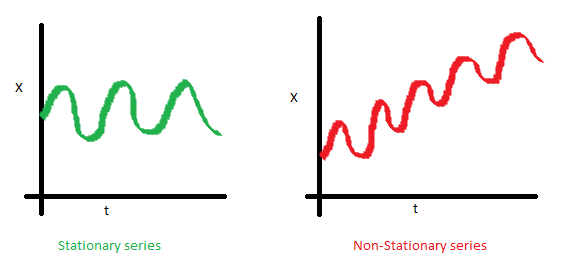
 - 2) 계열의 **분산**은 시간의 함수가 되어선 안됨  
 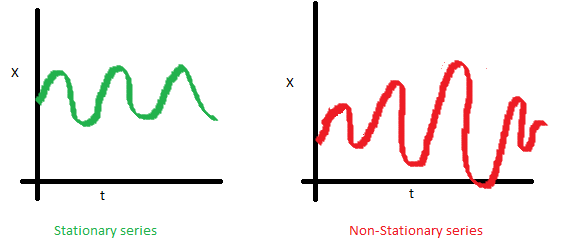
 - 3) i 번째 항과 (i+m)번째 항의 **공분산(Covariance)**은 시간의 함수가 아니어야함
 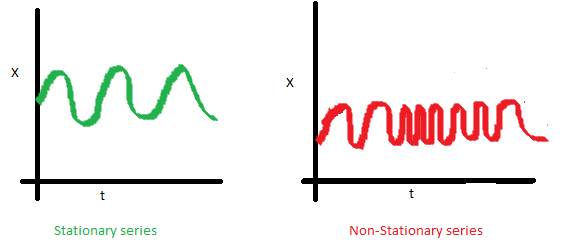  
 (참고 : https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)





### 용어 이해하기  
**1. 공분산(Covariance)**
* 보통 확률변수를 나타낼때 평균(중간부분), 분산(분포도)을 많이 씀.  
* 확률변수들이 **어떻게 퍼져있는지를 나타내주는 것이 공분산**임.  
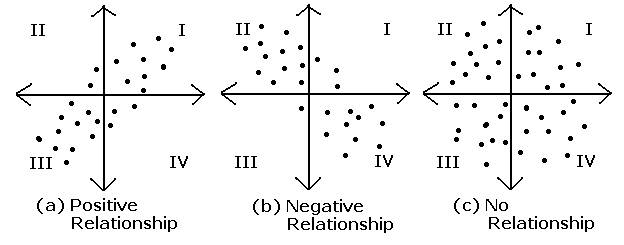  
    - Cov(X, Y) > 0    X가 증가 할 때 Y도 증가  
    - Cov(X, Y) < 0    X가 증가 할 때 Y는 감소    
    - Cov(X, Y) = 0    공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.
    - 그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다.  
* 확률변수 X의 평균(기대값), Y의 평균을 각각  

이라 했을 때, X,Y의 공분산은 아래와 같다.  

즉, **공분산은 X의 편차와 Y의 편차를 곱한것의 평균**이라는 뜻이다.  

좀 더 간편하게 정리하면, 
  
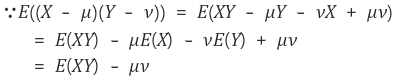  (E(X), E(Y)반대로 나옴)  
만약에 X와 Y가 **독립**이면  
  
이므로 공분산은 0이 된다. 

   

  
**2. 상관계수(Correlation)**
* 공분산의 문제점 :  X, Y의 단위의 크기에 영향을 받는다는 것. 100점짜리 2과목은 상관관계가 없어도 값의 크기가 100이기 때문에 큰 값이 나옴.  
* 이것을 보완하기 위한 것이 **상관계수(Correlation)**임    
    - 확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시켰다고 생각하면 됨. 즉, 분산의 크기만큼 나누었다고 생각하면 된다.  
    - 상관계수의 정의
    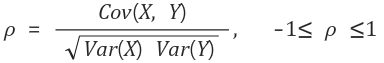
    
    
* **상관계수의 성질**  
    1. 상관계수의 절대값은 1을 넘을 수 없다.
    2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.
    3. X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1이다. 양의 선형관계면 1, 음의 선형관계면 -1  
    
    
**Q. 두 확률변수 X, Y 변수의 분포가 서로 얼마나 상관성을 가지는지를 나타내는 지표라는 점에서 Covariance와 Correlation은 비슷한 개념입니다. 그렇다면 두 개념은 어떤 점에서 다른가요?**  
 - My A : 공분산은 X,Y가 얼마나 상관성을 가지고 있는지 알려주는 지표로, X편차와 Y편차를 곱한 것의 평균 // 상관계수는 공분산이 X,Y의 크기에 영향을 받지 않기위하여, 각각의 분산값으로 나눠 단위화 시킨 것.
 - Ex A : Covariance가 X, Y 변수의 단위 크기에 영향을 받기 때문에 그 값 자체가 두 변수 간의 상관성을 직접적으로 대표하지 못한다. 그래서 Covariance를 Normalize하여(두 변수의 표준편차의 곱으로 나눠서) 두 변수 간의 상관성이 항상 -1에서 1 사이의 값 으로 표현되도록 보정한 것이 Correlation이다.   
 
**Q. 만약 X와 X의 Covariance를 계산한다면 이것은 다음 중 무엇과 같아지나요?  
1)평균(Mean) 2) 분산(Variance) 3) 표준편차(Standard Deviation) 4) 상관계수(Correlation)**  
 - 분산  
 
**Q. 두 확률변수 X, Y가 서로 독립이면 Covariance와 Correlation은 어떻게 되나요?**    
 - 둘다 0  
 

**3. 자기 공분산(Autocovariance)**
 * 자기 자신에서 h만큼 움직인 값과 공분산한 값
 * 변수 X에 대한 자기공분산이라면, X+h 와 공분산을 구하는 것이 자기 공분산이고, 이런 함수가 Autocovariance Function이라고함.
 
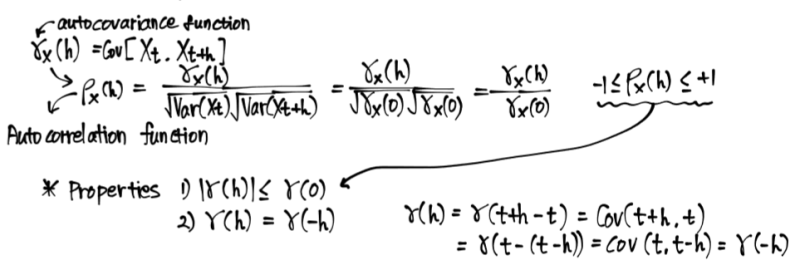

**4. 자기상관계수(Autocorrelation)**  
 * Autocovariance를 노멀라이즈 한 것으로 의미도 비슷함. 
 * 상관계수(correlation coefficients)와 자기상관계수(autocorrelation coefficients) 비교
     - 상관계수와 자기상관계수의 유사한 점은 두 연속형 변수 간의 관계를 분석하다는 것
     - 기본 개념은 공분산을 표준편차로 나누어서 표준화해주며, (자기)상관계수가 -1 ~ 1 사이의 값을 가지게 됨
     - 상관계수와 자기상관계수가 서로 다른 점은, 상관계수는 특정 동일 시점을 횡단면으로 해서 Y와 다른 X1, X2, ... 변수들 간의 관계를 분석함
     - 반면에 **자기상관계수는 동일한 변수(Yt, Yt-1, Yt-2, ...)의 서로 다른 시간 차이 (time lag) 를 두고 관계를 분석**하는 것입니다. 
     - 기존에 cross-sectional 관점의 Y와 X 변수들 간의 상관관계 분석에 많이 익숙해져 있는 경우에 시계열 분석을 공부할 때 보면 자기 자신의 시간 차이에 따른 자기상관관계 관점이 처음엔 헷갈리고 잘 이해가 안가기도 하지만, 관점이 바뀐것일 뿐 어려운 개념은 아니므로 정확하게 이해하고 가자
     - 참고 : https://rfriend.tistory.com/528
 
**자기공분산, 자기 상관계수의 특징**
 **1) h에 대한 자기공분산은 자체 자기공분산 보다는 항상 작거나 같다**. 이유는 자기상관 계수는 항상 -1보다 크거나 같고, +1보다는 작거나 같기 때문이다.

**2) h에 대한 자기공분산은 -h에 대한 자기공분산과 같다.** 직관적으로 h만큼 떨어진 신호와의 자기공분산이나, h 만큼 떨어진 데이터의 입장에선 -h와의 자기 공분산이므로, 이는 같을 수 밖에 없다.
수식적으로 증명하면 위에서 나타내었다.  


**Q.자기와의 공분산이라면 그냥 분산이 되는데, 분산이라고 하지 않고 자기공분산이라고 하는 이유는 무엇인가요?**  
 - X(t)와 X(t) 사이의 공분산이 아니라 X(t)와 X(t+h) 사이의 공분산이기 때문. 즉 일정 시차 h 사이를 둔 자기자신과의 공분산이기 때문이다.  
 **Q.X(t)와 X(t+h) 사이의 공분산과 X(t-h)와 X(t) 사이의 공분산은 항상 일정한가요? 아니면 어떤 조건 하에서만 성립하나요?**  
  - X가 Stationary한 시계열 변수라는 조건 하에서만 성립한다. 즉, 안정적인 시계열에 한해서 시차 h가 같다면 데이터의 상관성이 동일한 주기성이 나타난다.  
  
  
**과거를 통해 미래를 예측하려면,** 
- t에 무관하게 예측이 맞아 떨어져야함  
- 또한 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 함  
- X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야함  
- t에 따라 값이 다르다면, 과거의 패턴이 미래에도 반보될 것이라는 대전제가 깨지기 때문에 예측할 수 없음



### 시계열 데이터 사례 분석
---

1. 시계열(Time Series) 생성
---
- Daily Minimum Temperatures in Melbourne로 온도 변화를 다루는 시계열인만큼 안정성 있을 것.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os       #os모듈로 현재 파이썬이 실행되는 위치 확인, 특정폴더이동, 현재폴더 파일 리스트저장 등이 가능함

import warnings
warnings.filterwarnings('ignore') # 경고 비활성화함

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' #데이터 위치
                                                        #이렇게 주소를 따로 하면 보기 편하고 수정하기도 좋음
df = pd.read_csv(dataset_filepath) #데이터 불러오기
print(type(df)) # 판다스 데이터프레임
df.head()       #초기 값 확인

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
#시계열 데이터니 시간은 index로 바꿔줘야함
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) 
#인덱스 지정하기 index_col=0(위치), index_col='변수'
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


**pandas csv 파일 불러오기 참고 :https://rfriend.tistory.com/250 / https://soo-jjeong.tistory.com/127 / https://mizykk.tistory.com/16**

df = pd.read_csv(경로, index_col='컬럼명', parse_dates=True) 
- parse_dates=True 날짜를 datetime형태로 변환할지 여부인데, True라고 했으니 해당 컬럼에 있는 데이터는 날짜형태가 됨

In [9]:
#시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옴
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다.  
하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

### 시계열 안정성의 정성적 분석
---

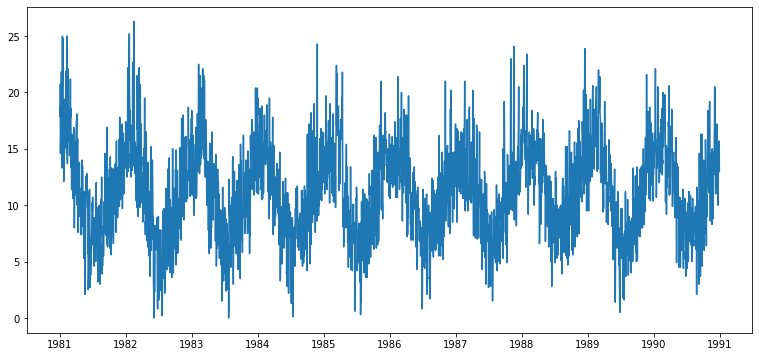

In [10]:
#시계열 파일 준비했으니, 시각화를 통해 안정성(Stationarity) 여부확인

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

#데이터를 보아 안정성있는 자료로 확인됨

In [11]:
#결측치 유무 확인
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Temp, dtype: float64)

결측치가 있다면 조치가 필요함. -> **NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석 결과에도 악영향을 미침**

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있음
1. 결측치가 있는 데이터를 모두 삭제(drop)

2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
    ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식

이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.

(Pandas에서 결측치 보간을 처리하는 메서드 참고 https://rfriend.tistory.com/264)

Series([], Name: Temp, dtype: float64)


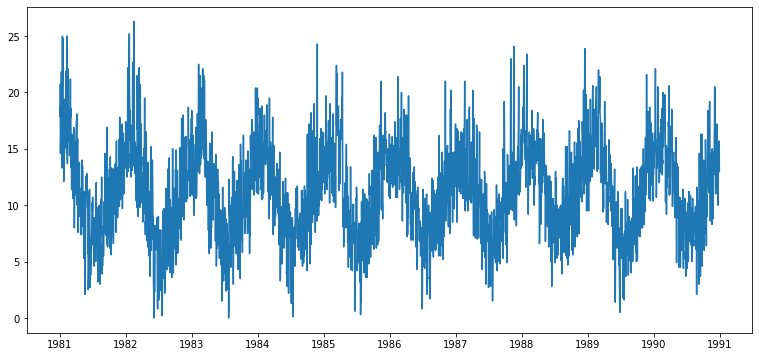

In [12]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같으나, 시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화 해볼 필요가 있음.  
아래는 **일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수**임  

`현재 타임 스텝`부터 `window에 주어진 타임 스텝 이전` 사이  
    1. 구간의 평균(rolling mean, 이동평균)과  
    2. 표준편차(rolling std, 이동표준편차)를  
원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것


**이동평균이란?**
* 이동평균(MA, Moving Average) 계산법을 이용해 산출된 이동평균선은 가격, 지수 등의 수치의 변화를 관찰하고 분석하는데 있어서 일정한 부분집합의 평균값 계산으로 인해 값의 전반적인 변화 흐름(추세)파악을 용이하게 해둠
* 이동평균법을 통해 도출된 이동평균 값을 선으로 연결하여 그래프로 표현한 이동평균선은 값의 변화와 추세에 의미를 부여하는 주식, 선물, 옵션 등 투자분야에서 기술적 분석의 도구로써 활발히 사용되고 있음
* **이동평균이란 수의 집합에서 특정 크기의 부분 집합을 연속적으로 이동하며 산출한 평균**  
* **이동평균은 일반 평균과는 다르게 한정되어있는 수 집합의 모든 값을 대상으로 평균을 산출하는 것과는 다르게 일정한 크기의 부분집합을 평균계산에 활용한다는 것이 특징**    
* 단순이동평균, 가중이동평균, 기하이동평균, 누적이동평균, 지수이동평균 등이 있음  
* 단순 이동평균(SMA, Simple Moving Average)의 계산 공식
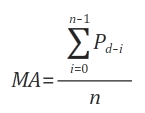  
    - 이동평균계산 공식에서 n은 부분집합의 크기이며 Pd는 데이터의 값을 의미함  
    - 위 이동평균계산 공식은 특정 데이터를 기준으로 부분집합의 수만큼 반복적으로 데이터를 더해서 부분집합의 크기만큼 나눈다는 것을 의미함  
    - 이동평균 계산법을 이용한 이동평균 계산 결과는 일정 데이터 집합(부분집합)에서 특징적으로 나타난 값들이 평균에 의해서 희석되는 효과가 나타남에 따라 전반적인 추세를 확인하는데 용이함.
    - 특히 가격 변화 추세를 확인할 경우, 일시적으로 발생한 돌출된 값에 의해서 추세 분석의 어려움이 있으나 이동평균 계산법은 돌출된 값이 희석되는 효과를 제공함과 동시에 계산 구간이 이동함에따라 지나친 과거 데이터로 인해 최근 형성된 데이터가 왜곡되는 문제를 방지해줌  
    - 다양한 부분집합 크기를 설정함으로 여러 부분 집합 크기의 이동평균 계산 결과 간 비교 분석을 할 수 있으며, 이로인해 다양한 데이터 구간 간의 추세 변화를 비교 분석할 수 있음  
    - 하지만 부분집합의 크기에 따라 달라지는 특징이 있음 -> **해당 분야에 맞는 부분집합 크기를 설정하는 것이 중요**함

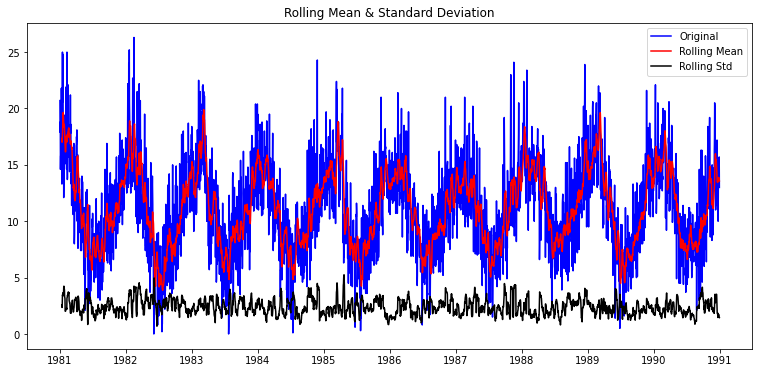

In [13]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열(BL), 이동평균(RD), 이동표준편차(BK)를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
#
plot_rolling_statistics(ts1, window=12)

이 시계열 데이터가 안정적이라고 명확하게 결론을 내릴 수 있을까?  
결과만 보면 그렇게 말할 수 있지만, 명확하게 하려면 더 통계적인 접근이 필요함. -> 다음에 이어서  

일정 시간 내 구간 통계치(Rolling Statistics) 시각화
`pandas.Series.rolling` : 동일한 사이즈만큼 옆으로 이동하면서 연산
`pandas.Series.rolling().mean()` : 이동평균
`pandas.Series.rolling().std()` : 이동표준편차

참고 : https://velog.io/@nameunzz/stationary-time-series

### 다른 데이터에 대해서도 비교해보자
---
`International airline passengers` 데이터셋 -> 월별 항공 승객수(천명단위)의 시계열 데이터 분석하기

In [14]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  #결측값은 0으로 교체
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드  
https://wikidocs.net/153209

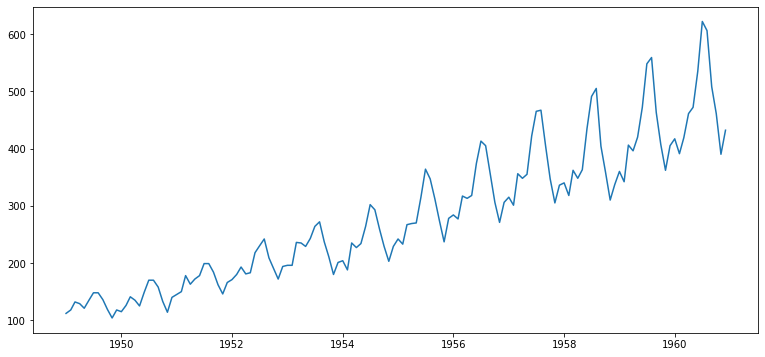

In [15]:
ts2 = df['Passengers']
plt.plot(ts2)

온도 변화 데이터셋과는 다른 패턴이 보임 -> 시간이 흐름에 따라 시계열의 분산과 평균이 커지는 모양을 보임  

**rolling statistics**를 통해 시각화!

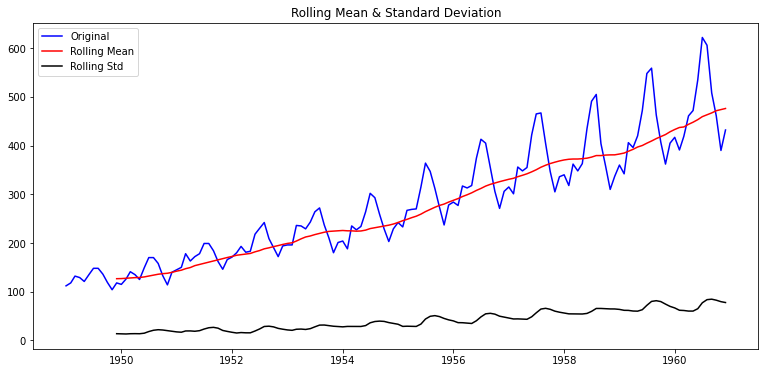

In [16]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 흐름에따라 평균과 분산이 증가하는 패턴이 있다면, 이 시계열 데이터는 적어도 안정적이진 않다는 결론을 내릴 수 있음.  


그렇다면 이런 데이터는 예측 시도를 할 수 없는 것일까?  
다음에 **불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법**을 다뤄볼 것  

시계열 데이터는 안정성 평가보다 `정량적인 방법`이 있음

### 5) Stationary 여부를 체크하는 통계적 방법
---

**Augmented Dickey-Fuller Test**  
- ugmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법을 공부할 것!

이는 
> 1. **주어진 시계열 데이터가 안정적이지 않다**라는 **귀무가설(Null Hypothesis)**를 세운 후,
> 2. 통계적 가설 검정 과정을 통해 이 **귀무가설이 기각될 경우**에
> 3. 이 시계열 데이터가 **안정적이다라는 대립가설(Alternative Hypothesis)을 채택**한다

❓귀무가설, 대립가설, p-value 란?  

 -  통계에서 가설은 우리가 알고 싶어 하는 “어떤 모집단의 모수(예: 평균, 분산, 등)에 대한 잠정적인 주장"  
  -> 따라서 통계적 가설은 앞서 예를 든 가설들과는 다르게 일정한 형식을 따라야함  
 - 그 형식이 바로 “ 귀무가설( Null hypothesis:H0)” 과 “ 대립가설( Alternative hypothesis:H1)”   
 - 통계적 가설 검정을 하려면 우선 두 가지 형식적 가설 (귀무가설 과 대립가설)을 설정하고, 어떤 가설을 채택을 할지를 확률적으로 따져보고 둘 중 하나를 채택함
 * 귀무가설이란? 
     - 통계학에서 처음부터 버릴 것을 예상하는 가설 -> “모집단의 모수는 00와 같다.” 또는 “ 모집단의 모수는 00와 차이가 없다.” 라고 가정하는 것
     - Ex. 전국 남학생 키가 170cm다 라는 주장 -> 귀무가설 : 전국 남학생의 평군키는 170cm와 같다.
 * 대립가설이란?
     - 귀무가설이 거짓이라면 대안적으로 참이 되는 가설 -> 귀무가설이 기각됐을 때, 대안적으로 선택하는 가설 -> “모집단의 모수는 00와 다르다.” 또는 “ 모집단의 모수는 00와 차이가 있다.”
     - Ex. 전국 남학생 키가 170cm다 라는 주장 -> 대립가설 : 전국 남학생의 평균키는 170cm와 다르다.
 * p-value란?
     - 귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예:표본평균)가 나타날 확률
     - p값이 낮다면 귀무가설이 참이라는 가정하에 표본을 추출했을때, 이런 표본 평균이 관측될 확률이 낮은 것
     - 즉, **p값이 매우 낮으면, 표본 통계량이 우연히 일어나기 어려운 케이스이기 때문에 귀무가설을 채택하지 않고 대립가설을 채택함**

그래서 ADF Test의 세부 알고리즘을 간단히 보고, `statsmodels 패키지`에서 제공하는 `adfuller 메서드`를 이용해 손쉽게 ADF Test의 결과를 이용할 것  

- ADF 검정은 정상성을 알아보기 위한 단위근 검정 방법이에요. 참고로 단위근(unit root)이란 x=1, y=1인 해로, 시계열 자료에서 예측할 수 없는 결과를 가져올 수 있음

- 검정에는 자료에 **단위근이 존재한다는 귀무가설(Null Hyperthesis, H0:α=1)과 자료에 단위근이 존재하지 않아 시계열 자료가 정상성을 만족한다는 대립가설(Alternative Hypothesis, H1:α=1)**, 이렇게 2가지 가설을 사용하고, **검정을 통해 귀무가설을 기각하면 정상성을 띤다**고 볼 수 있음  

* Dickey-Fuller 단위근 검정은 단위근이 존재한다는 귀무가설을 통계적으로 검정하는 방법
    - yt =c + βt + αy t−1 + ϕ∇yt−1 + et
    - 위의 식에서 cc는 시계열 데이터의 레벨, \betaβ는 시계열 데이터의 추세항이에요. 각 파라미터를 regression으로 추정해 \alphaα가 단위근을 가질 확률을 검정합니다. \alpha=1α=1이면 단위근을 가지는 것이기 때문에 정상성을 띠지 않는다고 판단
    - ADF 검정은 DF 검정에 p lag의 차분을 추가해 검정 능력을 더 강화
        + yt = c + βt + αyt−1 + ϕ1∇yt−1 +...+ϕp∇yt − p + e t  
        + DF 검정의 식에서 p lag의 차분만큼 항이 추가된 것을 알 수 있죠? t-pt−p 시점까지의 차분 경향성을 파악할 수 있어서 주기를 가진 데이터의 정상성 여부를 판단할 수 있어요.
    - ADF 검정의 귀무가설은 DF 검정과 귀무가설이 같으므로 __검정통계량이 Critical Value보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적__인 시계열 데이터라고 볼 수 있음
    - 참고 : https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/  
    
    
**유의 확률**  
-  significance probability, asymptotic significance) 또는 p-값(영어: p-value, probability value)
- 귀무가설이 맞다고 가정할 때, 얻은 결과보다 극단적인 결과가 실제로 관측될 확률  
- 유의확률은 실험의 표본 공간에서 정의되는 확률변수로서, 0~1 사이의 값
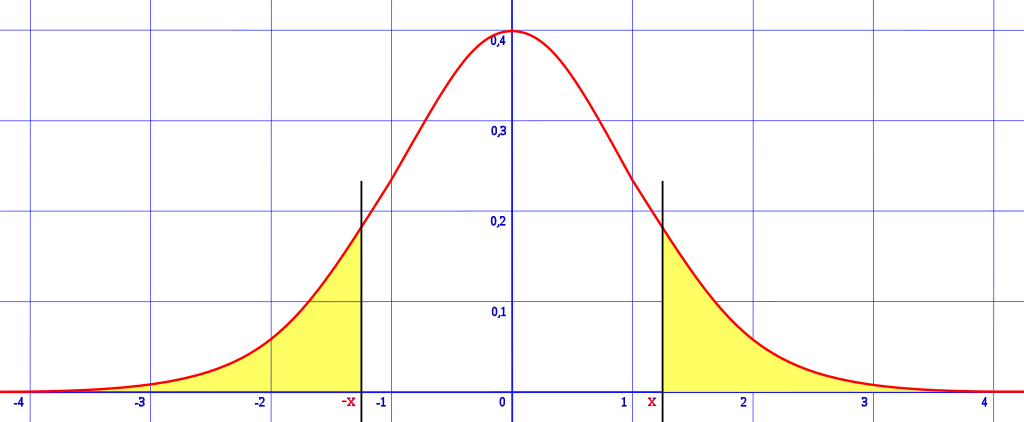  
- p-value가 작을수록 그 정도가 약하다고 보며, 특정 값 (대개 0.05나 0.01 등) 보다 작을 경우 귀무가설을 기각하는 것이 관례이나 여기에는 여러 가지 문제들이 있다  
- 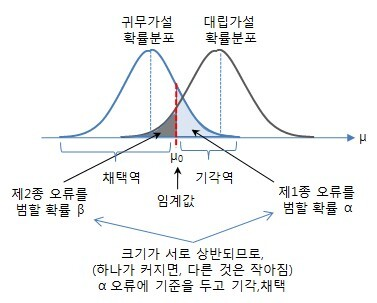  

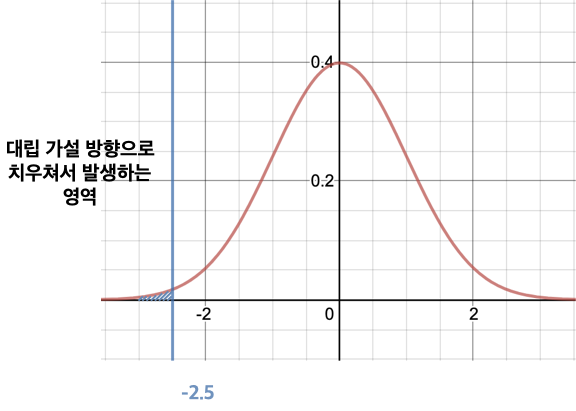
이를 표준 정규 분포표를 통해서 계산해보면 p-value는 0.0062가 됩니다. 앞서 우리는 귀무가설이 틀릴 수 있는 확률 α를 0.05로 고정해놓았습니다. 자 그렇다면 실제 관측을 진행할 때 파란색 직선 좌측에 해당하는 값이 등장했다고 생각해보겠습니다. 귀무 가설이 옳았더라면 이러한 값이 나올 확률은 0.0062입니다. 하지만 이보다는 귀무 가설이 옳지 않았을 확률인 0.05가 더 높습니다. 이는 곧 귀무 가설이 옳지 않았다라는 주장이 더 설득력이 있으므로 귀무 가설이 기각되는 것입니다.  
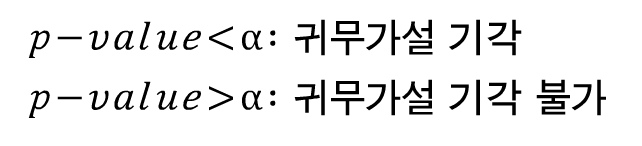  

위의 예시는 단측 검정이었기 때문에 정규 분포의 왼쪽 꼬리 부분만 고려하였습니다. 만일 양측 검정이라면 양쪽 양향으로 극단적인 값이 등장할 확률을 계산해야하며, 아래 그래프 상에서 빨간색 면적에 해당합니다.

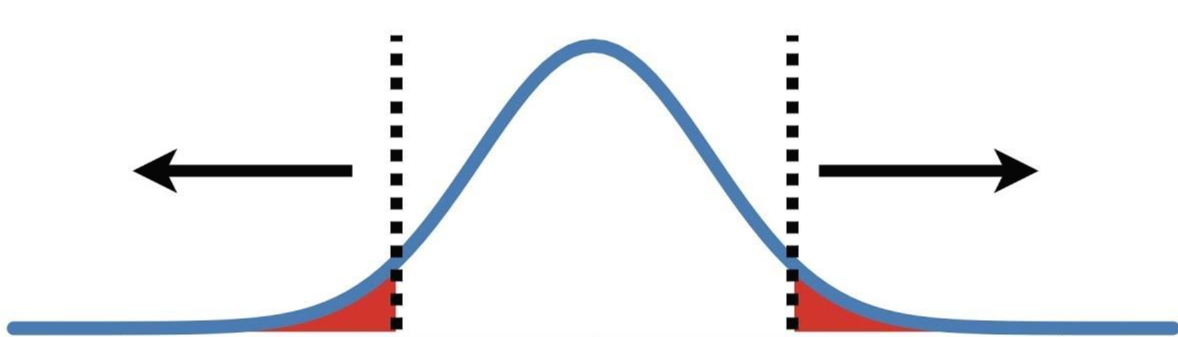
양측 검정 시의 p-value
p-value를 쉬운 말로 간단히 설명하고 넘어가겠습니다. 유의 확률이라는 말에서 알 수 있듯이 이는 가설이 얼마나 그럴듯 한지를 나타내주는 값이며 0부터 1 사이의 값을 가집니다. p 값이 0에 가까울수록 귀무가설의 설득력은 점점 약해지고 이를 기각하고 우리가 입증하고 싶은 대립 가설의 설득력은 점점 강해지게 됩니다.

참고 : https://yeomko.tistory.com/37

**statsmodels 패키지와 adfuller 메서드**  

---  
 - statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다.  
 - 아래는 `statsmodels` 패키지에서 제공하는 `adfuller` 메서드를 이용해 주어진 **timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드** 입니다.


In [17]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [18]:
#이전에 했던 두 시계열에 대한 ADF test 수행하기
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


- ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.  
- 따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [19]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.

p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.

하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

### 6)Stationary하게 만들 방법은 없을까?  
---
> `International airline passengers` 시계열을 조금 더 분석
> 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야함
> 1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 **기존의 시계열 데이터를 가공/변형하는 시도**
> 2. **시계열 분해(Time series decomposition) 기법**을 적용

1. 보다 Stationary한 시계열로 가공해 가기  
    1)  로그함수 변환
        * 시간 추이에 따라 분산이 점점 커진다는 것 -> **로그함수로 변환**이 도움!
    

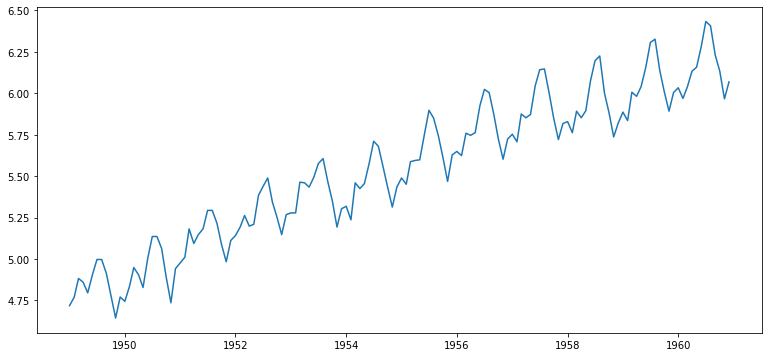

In [20]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [21]:
#로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test 수행
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었습니다. 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다. 아주 효과적인 변환이었던 것 같습니다. 하지만 아직은 갈 길이 멉니다. 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.

2. Moving average 제거 - 추세(Trend) 상쇄하기
---
시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 `추세(trend)`라고 합니다.  
이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 `ts_log`에서 빼주면 어떨까요?

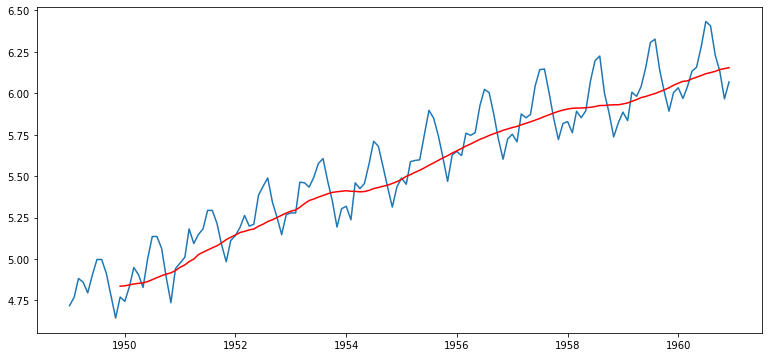

In [22]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [24]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

#dropna 관련 : https://cosmosproject.tistory.com/308
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.

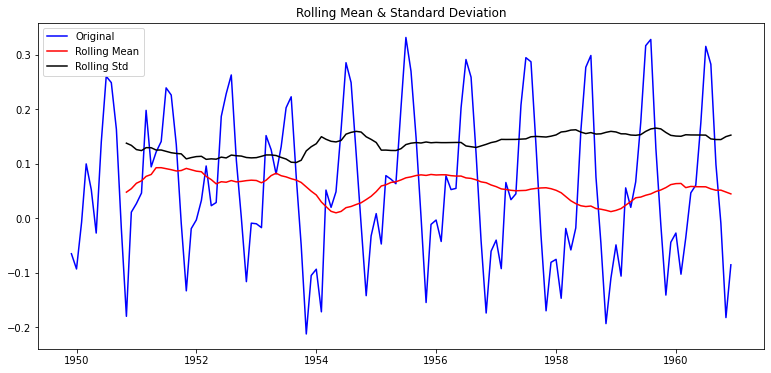

In [25]:
plot_rolling_statistics(ts_log_moving_avg)

In [26]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

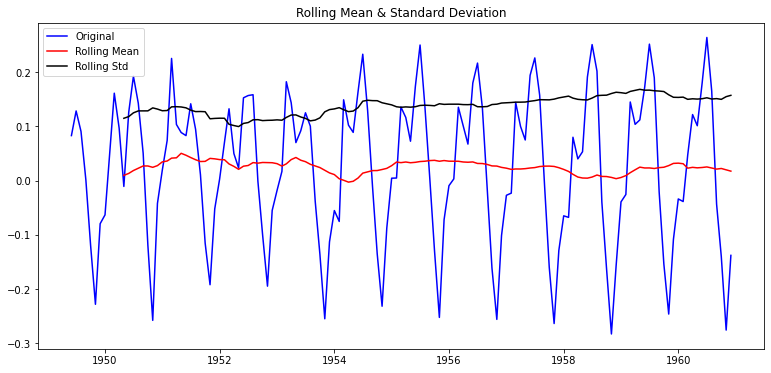

In [27]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

plot_rolling_statistics(ts_log_moving_avg_6)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, **moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다**는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기  
---
Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.  

- 참고 : https://otexts.com/fppkr/tspatterns.html 시계열 패턴  

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있습니다. 마치 미분(Differentiation)을 떠올리게 하는 개념인데요, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다. 이렇게 되면 남은 것은 **현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미**하게 됩니다. 이 변화량 시계열은 어떤 패턴을 보이게 될까요?

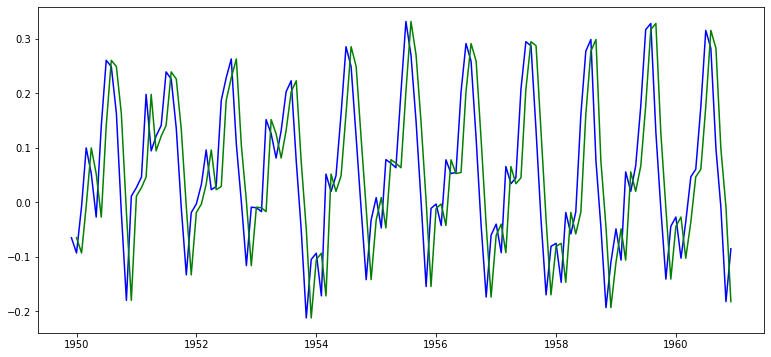

In [29]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

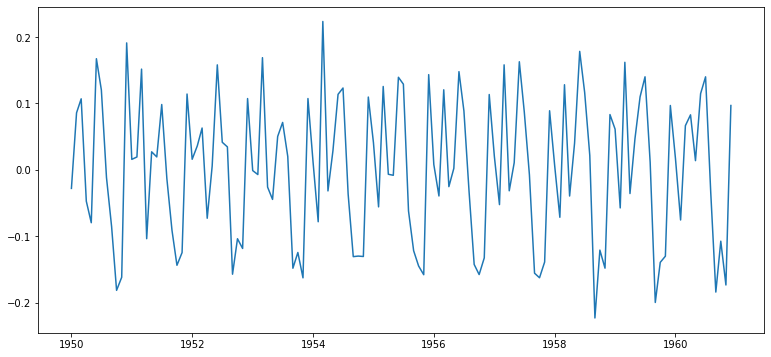

In [30]:
#원본 시계열에서 시프트한 시계열을 뺀 값을 그래프
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

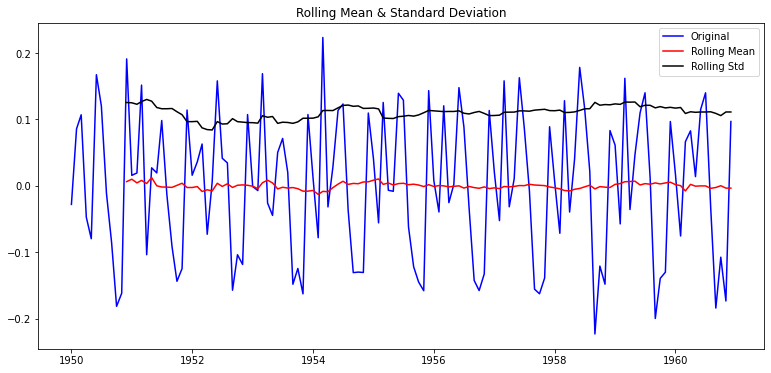

In [31]:
#이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악
plot_rolling_statistics(ts_log_moving_avg_diff)

In [32]:
#차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행  
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

**2. 시계열 분해(Time series decomposition)**

---

statsmodels 라이브러리 안에는 `seasonal_decompose 메서드`를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다.   
이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

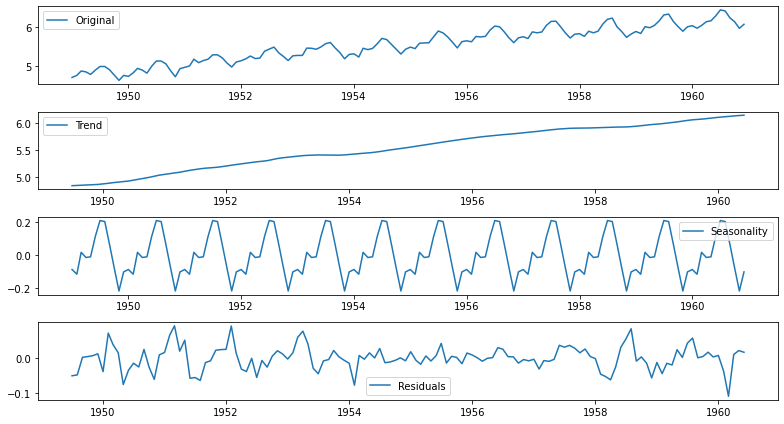

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다.  
뒤집어서 말하면 **Trend+Seasonality+Residual=Original 이 성립**한다는 뜻입니다.  
이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.  

그렇다면 이제 Residual에 대해 안정성 여부를 따져 봅시다.

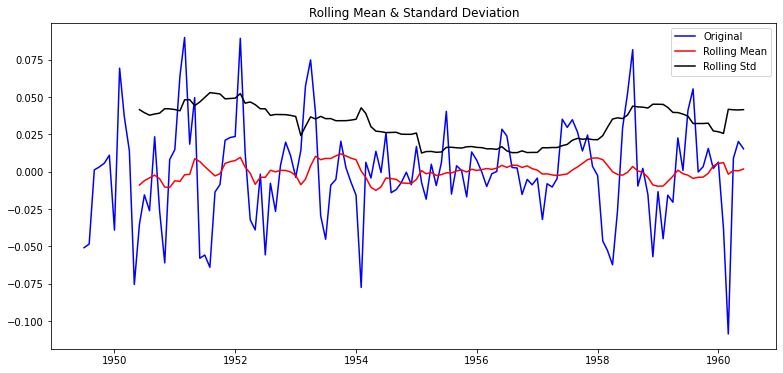

In [34]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [35]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다.   
이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다.   
어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요?  
물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

### 7. ARIMA 모델의 개념
#### 1. ARIMA 모델의 정의
---
- 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인.   
- 또, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인함
- ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있음
- ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있는데, 각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 됨  


1-1. AR(자기회귀, Autoregressive)  
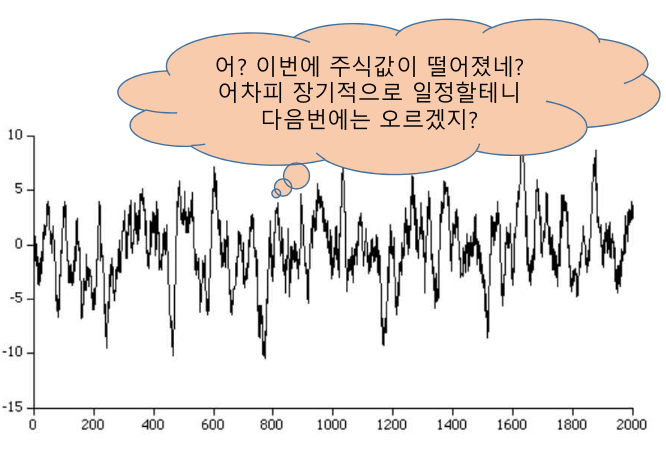  
 * 과거 값들에 대한 회귀로 미래 값을 예측하는 방법. 
 * Yt가 이전 p개의 데이터 Yt−1 ,Yt−2 ,...,Yt−p의 가중합으로 수렴한다고 보는 모델
     - AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있음
     - 가중치의 크기가 1보다 작은 Yt−1,Yt−2,...,Yt−p 의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치
     - 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있음  
     
     
1-2 MA(이동평균, Moving Average)
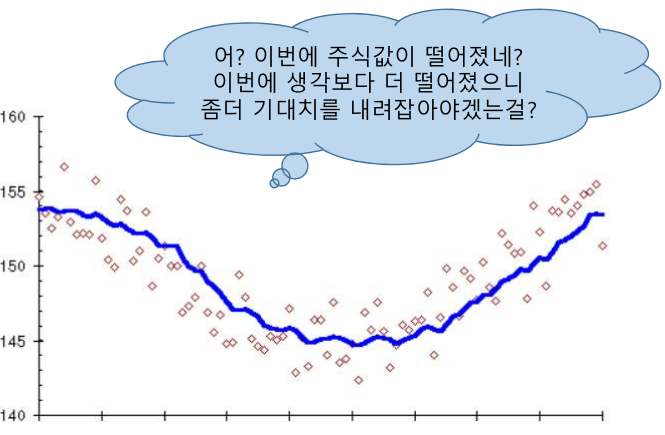
* MA는 Yt가 이전 q개의 예측오차값 et−1,et−2,...,et−q의 가중합으로 수렴한다고 보는 모델
    - MA는 시계열의 Trend에 해당하는 부분을 모델링한다고 볼 수 있음
    - 예측오차값 et−1이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻이므로, 다음 Yt예측 시에는 예측치를 올려잡게됨
    - 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점
    
    
1-3. I(차분 누적, Integration)
* I는 Yt이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델
    - I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있음
    - 예를 들어 d=1이라면 Yt는 Yt−1과 ΔYt−1의 합으로 보는 것입니다.
    

ARIMA는 위 3가지 모델을 모두 한꺼번에 고려  

위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때,

- '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대
- '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오름

ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 줍니다.


#### 2. ARIMA 모델의 모수 p, q, d
---
ARIMA를 효과적으로 활용하기 위해서는 **ARIMA의 모수(parameter)를 잘 설정**해야함  
핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 것  

ARIMA의 모수는 아래의 3가지가 있습니다
- p : 자기회귀 모형(AR)의 시차
- d : 차분 누적(I) 횟수
- q : 이동평균 모형(MA)의 시차  


이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데, 이는 p 나 q 중 하나는 0이라는 뜻입니다.  
이렇게 하는 이유는 많은 **시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문**입니다.  

그러면 모수 p, q, d는 어떻게 결정될까요? 여기서부터의 설명이 매우 어렵습니다.  

ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면 `ACF(Autocorrelation Function)`와 `PACF(Partial Autocorrelation Function)`를 말할 수 있습니다.   
이 AutoCorrelation은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것입니다.  

* `ACF` 
    - 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
    - 주어진 시계열의 현재 값이 **과거(y_{t-1}, y_{t-2}, ...., y_{t-n}) 값과 어떻게 상관**되는지 설명함.
    - ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄

* `PACF`
    - **다른 관측치의 영향력을 배제**하고 두 시차의 관측치 간 관련성을 측정하는 함수
    - k 이외의 모든 시차를 갖는 관측치(y_{t-1}, y_{t-2}, ...., y_{t-k+1})의 영향력을 배제한 가운데 **특정 두 관측치, t와 yt−k가 얼마나 관련**이 있는지 나타내는 척도.

* 참고 자기상관함수 및 편자기상관함수:  http://kanggc.iptime.org/em/chap9/chap9.pdf

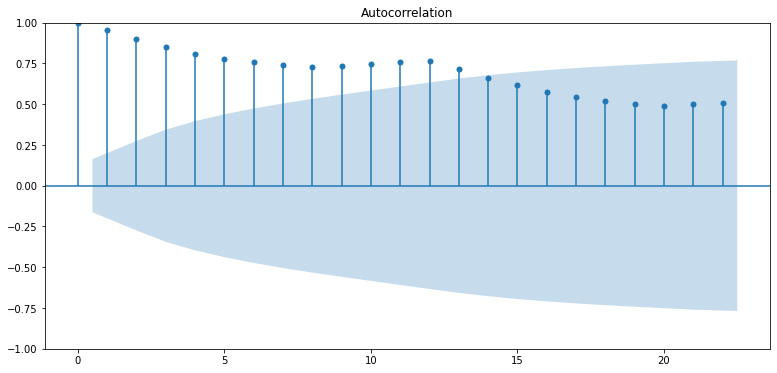

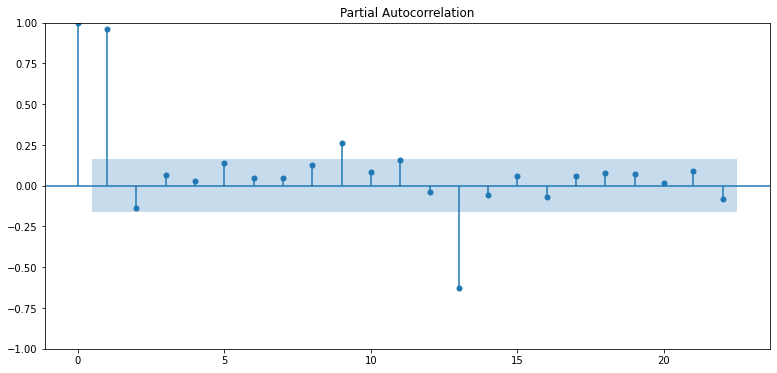

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 **ACF를 통해 MA 모델의 시차 q를 결정**하고, **PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명**하는 아티클에서 요약 결론 부분만 가져온 것입니다.

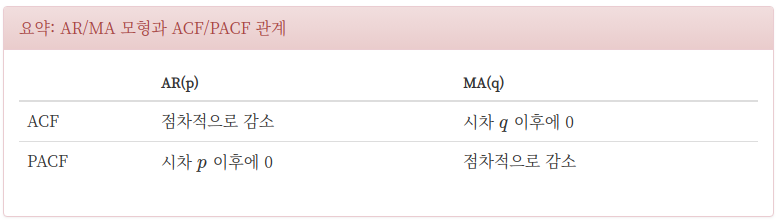

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다.  
p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다.  
**PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻**입니다.  
반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다. **q에 대해서는 적합한 값이 없**어 보입니다. **MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋음**  


d를 구하기 위해서는 좀 다른 접근이 필요합니다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.



Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


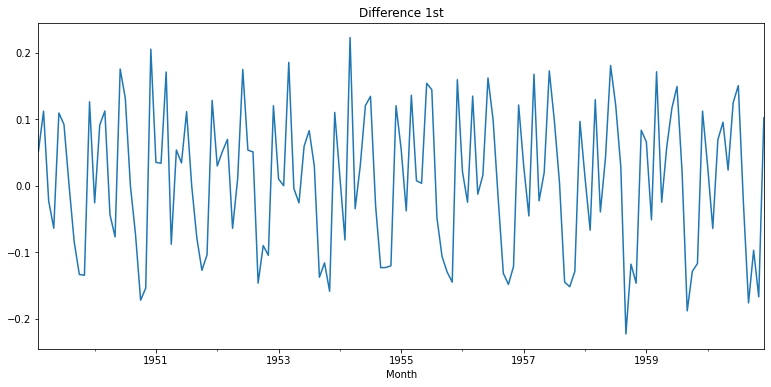

In [37]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


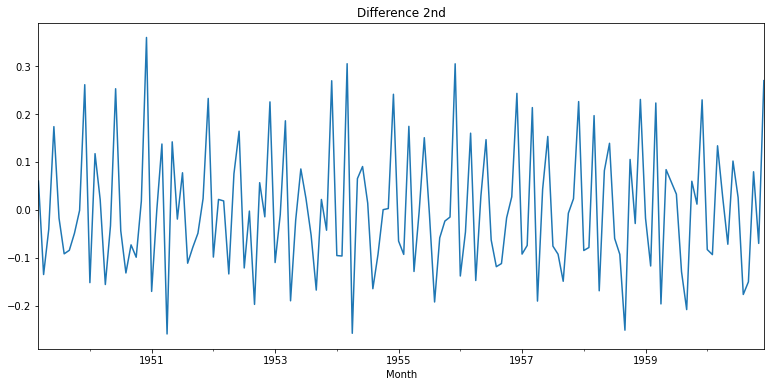

In [38]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다. 2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같습니다. d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.



#### 3. 학습 데이터 분리
---

아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.

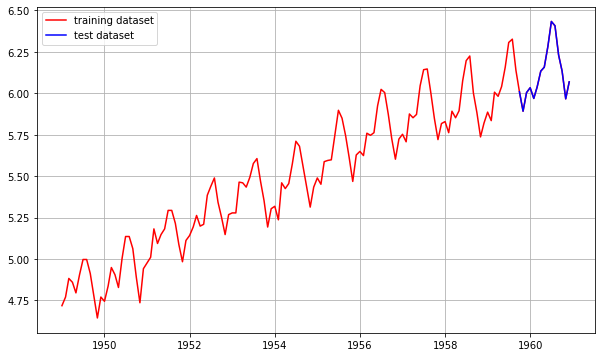

In [39]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True) #격자무늬
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [40]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### 8) ARIMA 모델 훈련과 추론
---

In [41]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.942
Date:                Tue, 03 May 2022   AIC                           -409.883
Time:                        09:12:42   BIC                           -367.103
Sample:                    01-01-1949   HQIC                          -392.502
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2651      0.081     -3.277      0.001      -0.424      -0.107
ar.L2         -0.0044      0.108     -0.040      0.968      -0.216       0.208
ar.L3          0.0021      0.046      0.046      0.9

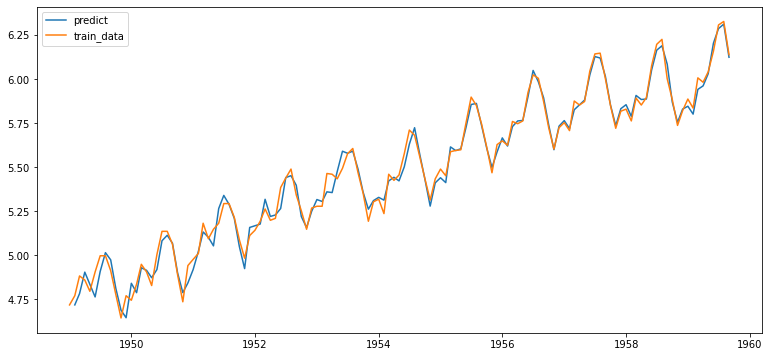

In [42]:
#시각화
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

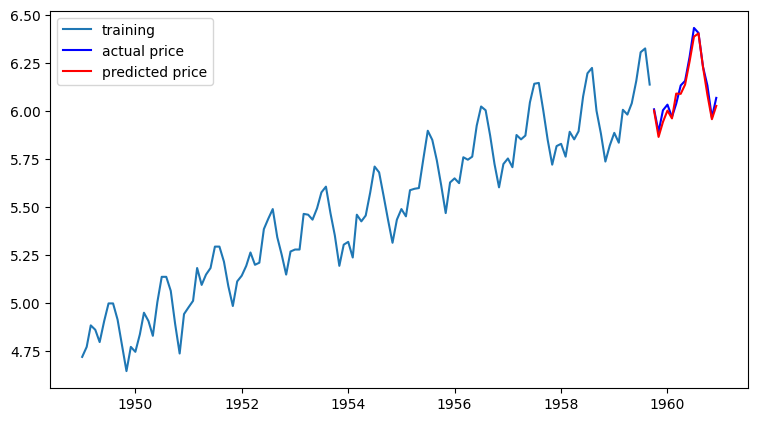

In [43]:
#forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있습니다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산합니다.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  236.27939252509398
MAE:  12.55810531713422
RMSE:  15.371382258115045
MAPE: 2.76%


최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보입니다. 썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다. p=14을 줄 경우 MAPE가 2% 정도로 내려갑니다.
조금더 다양한 테스트를 거쳐 최적화된 모델을 만들어 보시면 좋을것 같습니다.

다음 스텝에서 훨씬 크고 실전적인 데이터셋에 도전해 봅시다!!

